In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#seperate dependent and independent variable
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
#In our dataframe table we can not igonore the zero values the Glucose and bludpessure column contain 0 so we can relace the data 
# with its mean values

In [9]:
zero_not=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for col in zero_not:
    df[col]=df[col].replace(0,np.NaN)
    mean=int(df[col].mean(skipna=True))
    df[col]=df[col].replace(np.NaN,mean)

In [10]:
#seperate dependent and independent variable
X=df.drop('Outcome',axis=1)
Y=df['Outcome']
# the Indepemdent variable 
X 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47


In [11]:
#The dependent Variable
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [12]:
#Splitting the data into 80-20 ratio for training  and testing
#X_train, X_test, Y_train,Y_test= train_test_split(X, y,random_state=0, test_size=0.20) also write like this
# 80% of data points will go to this X_train and corresponding 80% labels  will go to Y_trainst= train_test_split(X, Y# and 20 % of test data will go to X_test and corresponding 20%  test feature will go Y_test , test_size=0.20,random_state=0)
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,random_state=104,test_size=0.2);

In [13]:
# Lets check the shape of the oroginal data
print(df.shape)

(768, 9)


In [15]:
print(X_train.shape) #80 % train data
print(Y_train.shape) #80% test data
print(X_test.shape) #20 % train data
print(Y_test.shape)# 20 % test data

(614, 8)
(614,)
(154, 8)
(154,)


In [16]:
# 80% of data points will go to this X_train and corresponding 80% labels  will go to Y_train
# and 20 % of test data will go to X_test and corresponding 20%  test feature will go Y_test 

In [17]:
print(np.NaN)

nan


In [18]:
# #Feature Scaling
# Any algorithem that computes the distence or assumption normally ,scale our feature \
#The training part is done here
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [19]:
#Define the model :Init K-NN
classifier =KNeighborsClassifier(n_neighbors=11,p=2,metric="euclidean")

In [20]:
#Fit Model
classifier.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [21]:
import math

In [22]:
math.sqrt(len(Y_test))  #we can take the round vlaue as 11 as odd number is preferable for Kearest neighbour

12.409673645990857

In [23]:
#ITS TIME FOR TESTING TO DO OUR 20 % DATA
#Predict the Result

In [24]:
#Testing prediction rsult
y_pred=classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [29]:
#Evalulate the model
#print(Y_test.shape)
# 20 % test data
#it contain actual data,j contain predicted data
cm=confusion_matrix(Y_test,y_pred)
print(cm)                        

[[89 17]
 [22 26]]


In [30]:
print(f1_score(Y_test,y_pred))

0.5714285714285714


In [31]:
 print(accuracy_score(Y_test,y_pred))   

0.7467532467532467


In [32]:
#here we got our model is predicting 80% currect result 

In [33]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,1


In [34]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [35]:
df[0]

KeyError: 0

In [ ]:
df.Pregnancies[0]

In [ ]:
df

In [36]:
pd.DataFrame(df.Glucose)

,Glucose
0,148.0
1,85.0
2,183.0
3,89.0
4,137.0
...,...
763,101.0
764,122.0
765,121.0
766,126.0


In [45]:
plt.scatter(words[:,0], words[:,1])
for i, txt in enumerate(review):
    plt.annotate(txt, (words[i,0], words[i,1]))

NameError: name 'words' is not defined

NameError: name 'plt' is not defined

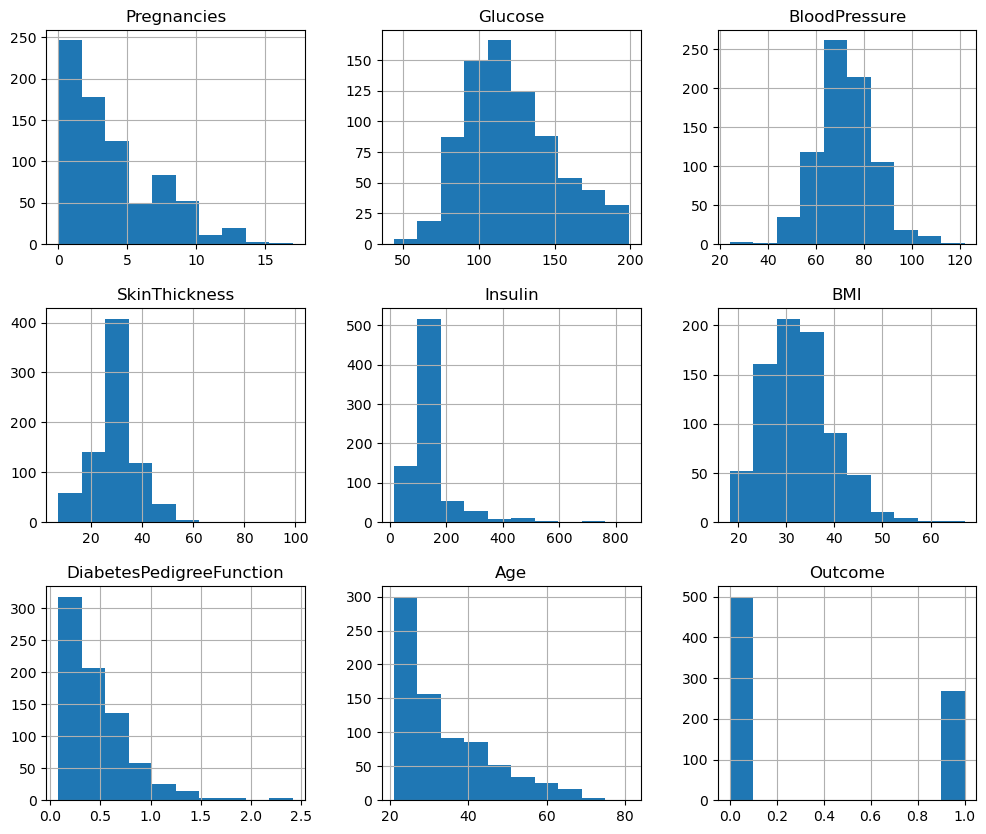

In [39]:
# Histograms
df.hist(figsize=(12, 10))
plt.suptitle('Histogram of Each Feature')
plt.show()


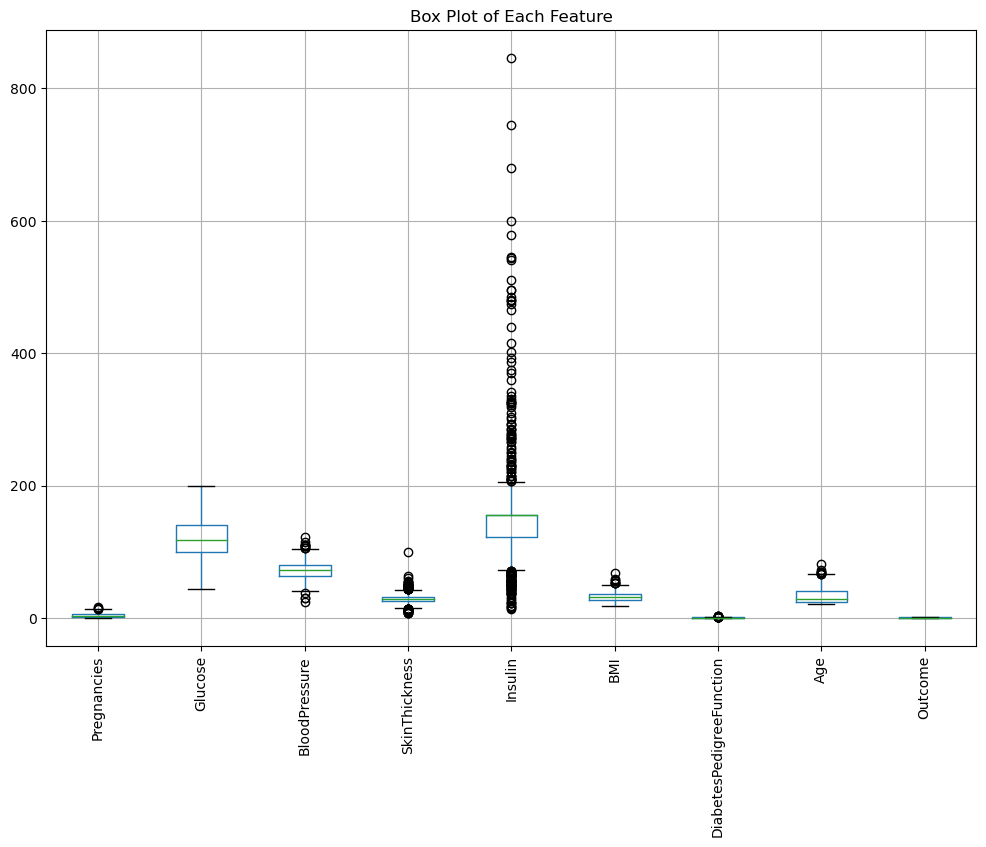

In [41]:
# Box Plots
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Box Plot of Each Feature')
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x800 with 0 Axes>

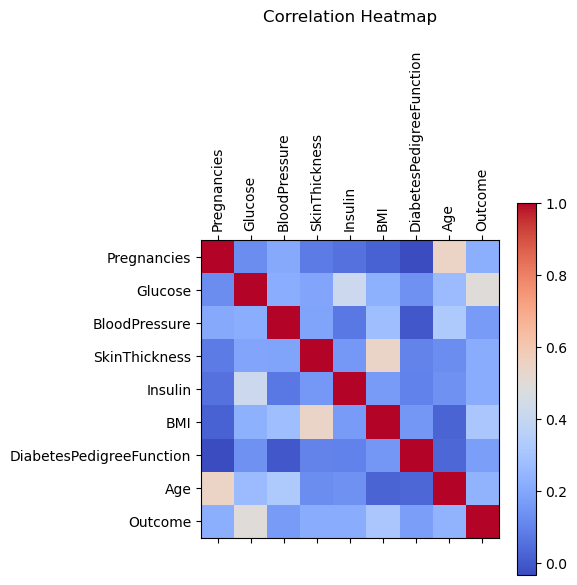

In [42]:
plt.figure(figsize=(10, 8))
corr = df.corr()
cax = plt.matshow(corr, cmap='coolwarm')
plt.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Heatmap', pad=20)
plt.show()


In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(df['feature'], df['target'], label='Actual')  # replace 'feature' and 'target' with actual column names
plt.plot(df['feature'], predictions, color='red', label='Predicted')
plt.title('Actual vs. Predicted with Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


KeyError: 'feature'

<Figure size 1000x600 with 0 Axes>

In [44]:
residuals = df['target'] - predictions  # replace 'target' with actual column name
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


KeyError: 'target'